In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

In [2]:
df_call=pd.read_csv("FINAL CALL DATA.csv")


In [3]:
df_call

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [4]:
n = len(df_call)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [5]:
train = df_call[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_train = train[' [C_LAST]'].values

In [6]:
test = df_call[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_GAMMA]', ' [C_VEGA]', ' [C_RHO]', ' [C_DELTA]', ' [C_THETA]']].values
y_test = test[' [C_LAST]'].values

In [27]:
model_call = xgb.XGBRegressor(
    max_depth=4,
    n_estimators=1000,
    eta=0.1,
    gamma = 0.1,
    reg_lambda=10,
    reg_alpha=1,
    verbosity=2,
    min_child_weight=3,
    scale_pos_weight =10)

In [28]:
model_call.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)

[01:43:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	validation_0-rmse:37.29915	validation_1-rmse:48.14005
[01:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	validation_0-rmse:33.77280	validation_1-rmse:44.82014
[01:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	validation_0-rmse:30.60330	validation_1-rmse:41.77238
[01:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	validation_0-rmse:27.75207	validation_1-rmse:39.13454
[01:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=10, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [29]:
y_train_pred=model_call.predict(X_train)

In [30]:
print(len(y_train_pred))

193907


In [31]:
train['Call_XGB']=y_train_pred
train

<ipython-input-31-a955d9e592a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_XGB']=y_train_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_XGB
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,30.090288
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,29.553806
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,27.469587
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,20.926640
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,21.863550
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,31.652241
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,29.384512
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,27.270359
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,26.238747


In [32]:
y_true=train[' [C_LAST]']
y_pred=train['Call_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.399086483213823
MSE =  11.053987536339754
RMSE =  3.3247537557448905


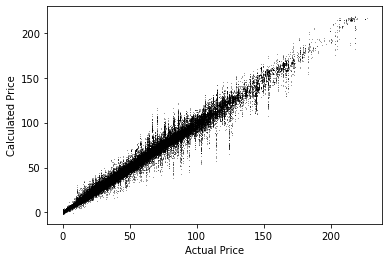

In [33]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

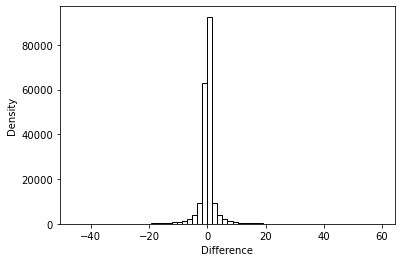

In [34]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [35]:
y_test_pred=model_call.predict(X_test)

In [36]:
len(y_test_pred)

83103

In [37]:
test['Call_XGB']=y_test_pred
test

<ipython-input-37-088ebf25133c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_XGB']=y_test_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_XGB
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,20.525766
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,17.395714
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,15.938910
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,12.911723
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,12.567607
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,11.824546
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,9.003690
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,5.692127
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,4.972510


In [38]:
y_true=test[' [C_LAST]']
y_pred=test['Call_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  5.084064754688705
MSE =  139.63177054459337
RMSE =  11.81658878630349


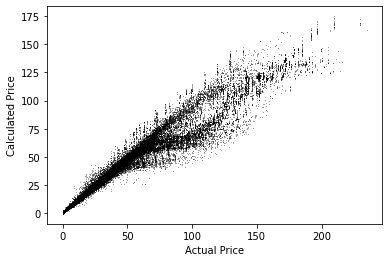

In [39]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

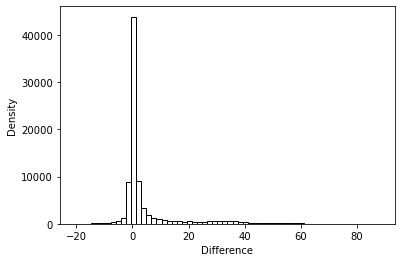

In [40]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [21]:
# param_grid = {
#     'max_depth' : [5, 10],
#     'n_estimators' : [1000, 200],
#     'eta' : [0.1, 0.01, 0.5],
#     'gamma' : [0, 0.5],
#     'reg_lambda' : [10, 20],
# }

In [22]:
# from sklearn.model_selection import GridSearchCV

In [23]:
# optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(seed=42, subsample=0.8, colsample_bytree=0.8),
#                               param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=4, cv=3)

In [24]:
# optimal_params.fit(X_train, 
#                    y_train,
#                    eval_metric="rmse", 
#                    eval_set=[(X_test, y_test)], 
#                    verbose=True, 
#                    early_stopping_rounds = 20)
# print(optimal_params.best_params_)

In [41]:
# train.to_csv('XGB_GREEKS CALL train FINAL Results.csv', mode='a', index=False, header=True)

In [42]:
# test.to_csv('XGB_GREEKS CALL test FINAL Results.csv', mode='a', index=False, header=True)

In [43]:
# import pickle
# filename = 'Call_XGB_GREEKS.sav'
# pickle.dump(model_call, open(filename, 'wb'))


In [44]:
df_put=pd.read_csv("FINAL PUT DATA.csv")
df_put

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [45]:
n = len(df_put)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [46]:
train = df_put[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_DELTA]', ' [P_GAMMA]', ' [P_THETA]', ' [P_RHO]', ' [P_VEGA]']].values
y_train = train[' [P_LAST]'].values

In [47]:
test = df_put[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]', ' [P_DELTA]', ' [P_GAMMA]', ' [P_THETA]', ' [P_RHO]', ' [P_VEGA]']].values
y_test = test[' [P_LAST]'].values

In [52]:
model_put = xgb.XGBRegressor(
    max_depth=12,
    n_estimators=1000,
    eta=0.1,
    gamma = 0.1,
    reg_lambda=10,
    reg_alpha=1,
    verbosity=2,
    min_child_weight=3,
    scale_pos_weight =10)

In [53]:
model_put.fit(
    X_train, 
    y_train, 
    eval_metric="mae", 
    eval_set=[(X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 1)

[01:48:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 596 extra nodes, 14 pruned nodes, max_depth=12
[0]	validation_0-mae:8.24749
[01:48:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 594 extra nodes, 12 pruned nodes, max_depth=12
[1]	validation_0-mae:7.18581
[01:48:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 618 extra nodes, 14 pruned nodes, max_depth=12
[2]	validation_0-mae:6.34638
[01:48:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 652 extra nodes, 32 pruned nodes, max_depth=12
[3]	validation_0-mae:5.71397
[01:48:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 600 extra nodes, 20 pruned nodes, max_depth=12
[4]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=12,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=10, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [54]:
model_put.evals_result()

{'validation_0': OrderedDict([('mae',
               [8.247492,
                7.185813,
                6.346385,
                5.713966,
                5.273253,
                4.954788,
                4.746227,
                4.597636,
                4.549189,
                4.549336])])}

In [55]:
y_train_pred=model_put.predict(X_train)
print(y_train_pred)
train['Put_XGB']=y_train_pred
train

[0.20635214 0.20635214 0.20635214 ... 2.842201   3.1613514  4.2778554 ]


<ipython-input-55-cd6d851b53e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_XGB']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_XGB
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762,0.206352
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797,0.206352
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820,0.206352
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833,0.206352
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845,0.206352
...,...,...,...,...,...,...,...,...,...,...,...,...
169257,194.19,1.597370,115.0,2.64,-0.06887,0.00180,0.32254,-0.00907,-0.25549,0.30592,1.855151,1.680053
169258,194.19,1.597370,120.0,3.14,-0.08134,0.00203,0.36610,-0.00979,-0.30273,0.29955,2.223690,1.951440
169259,194.19,1.597370,130.0,4.35,-0.11056,0.00271,0.45990,-0.01202,-0.41518,0.28727,3.131459,2.842201
169260,194.19,1.597370,135.0,5.18,-0.12741,0.00297,0.50695,-0.01294,-0.47852,0.27936,3.599630,3.161351


In [56]:
y_true=train[' [P_LAST]']
y_pred=train['Put_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  5.771219398603229
MSE =  167.6016569142331
RMSE =  12.94610585906948


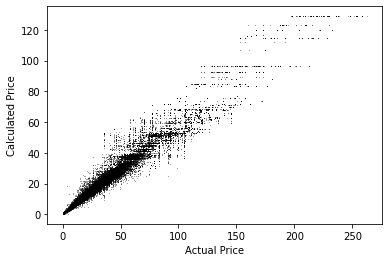

In [57]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

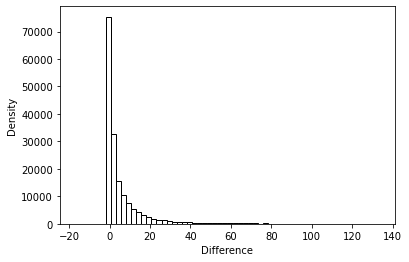

In [58]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [59]:
y_test_pred=model_put.predict(X_test)

In [60]:
len(y_test_pred)

72540

In [61]:
test['Put_XGB']=y_test_pred
test

<ipython-input-61-716bfb0c366d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_XGB']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_XGB
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,5.709917
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,6.450598
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,7.481337
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,8.476313
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,9.377783
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,84.714890
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,107.170547
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,107.170547
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,122.998123


In [62]:
y_true=test[' [P_LAST]']
y_pred=test['Put_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  4.549183158227809
MSE =  73.06577497328021
RMSE =  8.547852067816816


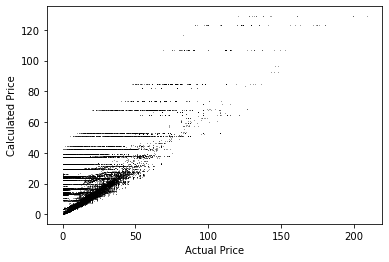

In [63]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

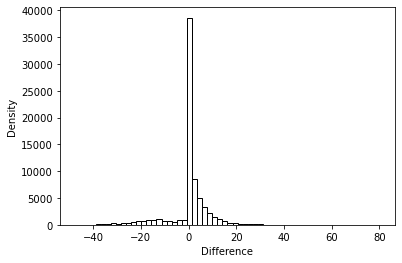

In [64]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [65]:
# train.to_csv('XGB GREEKS PUT train FINAL Results.csv', mode='a', index=False, header=True)

In [66]:
# test.to_csv('XGB GREEKS PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [67]:
# filename = 'Put_XGB_Greeks.sav'
# pickle.dump(model_put, open(filename, 'wb'))
